# Final Project: Predicting Performance of Stocks in the Dow Jones Index

## Importing the Data

In [2]:
import pandas as pd
df = pd.read_csv('dow.data')

In [3]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


## Random Forest

## Clustering

The Machine Learning and Data Mining in Pattern Recognition paper uses the Dynamic Radius Species Conserving Genetic Algorithm, a kind of clustering algorithm. Since we haven't learned this in class, we can try to reproduce the results using clustering. They developed rules from the dataset to assign an indicator to each stock per week. The stock with a higher indicator would be selected. However, if two stocks have the same indicator then they choose the stock with the greatest price percent gain. Since we aren't able to assign indicators to the dataset, we can reproduce the results by measuring the price percent gain. 

The Dow Jones has 0.13% weekly rate of return while the DSGA has an average 0.54% weekly rate of return.

In [9]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [26]:
kmeans = KMeans(n_clusters=9)

In [27]:
ourcolors = ['red','blue','black','green','yellow','magenta','orange','brown','grey','aqua']

In [28]:
#get the price movement 
x = df.percent_change_price
x = x.values.reshape(-1,1)
print(x.shape)

(750, 1)


In [29]:
#get the days to the next dividend
y = df.date
y = y.values.reshape(-1,1)
print (y.shape)

(750, 1)


In [30]:
kmeans.fit(x)

KMeans(n_clusters=9)

In [31]:
kmeans.labels_

array([3, 2, 5, 7, 6, 0, 8, 1, 1, 5, 0, 3, 7, 3, 8, 2, 8, 6, 1, 5, 8, 0,
       0, 7, 6, 0, 0, 5, 3, 0, 0, 8, 8, 8, 5, 3, 3, 6, 2, 2, 3, 7, 8, 1,
       1, 7, 1, 2, 8, 0, 1, 3, 3, 3, 7, 5, 0, 5, 7, 7, 7, 7, 5, 0, 6, 4,
       8, 8, 1, 1, 5, 8, 8, 7, 0, 8, 3, 8, 3, 3, 7, 2, 3, 3, 8, 3, 5, 3,
       3, 3, 3, 1, 8, 1, 8, 0, 3, 0, 7, 1, 3, 6, 0, 0, 0, 1, 5, 3, 8, 0,
       3, 7, 7, 3, 8, 8, 5, 8, 5, 0, 5, 6, 7, 0, 8, 7, 3, 2, 0, 8, 5, 3,
       6, 3, 7, 5, 3, 7, 0, 4, 1, 5, 8, 7, 0, 7, 3, 7, 3, 8, 0, 8, 8, 0,
       5, 3, 1, 7, 1, 7, 0, 8, 7, 8, 8, 5, 5, 7, 8, 0, 0, 2, 0, 8, 0, 1,
       7, 5, 1, 0, 7, 3, 0, 1, 0, 3, 3, 1, 5, 0, 0, 8, 1, 7, 8, 5, 7, 1,
       0, 3, 8, 0, 1, 7, 2, 0, 8, 1, 0, 7, 7, 7, 7, 8, 5, 3, 5, 8, 0, 1,
       0, 3, 8, 1, 7, 0, 2, 7, 8, 3, 7, 1, 0, 3, 7, 5, 0, 1, 5, 7, 3, 4,
       8, 5, 1, 0, 8, 1, 3, 8, 1, 7, 7, 0, 8, 1, 8, 1, 8, 8, 5, 1, 5, 7,
       3, 0, 8, 1, 6, 5, 7, 8, 3, 8, 3, 0, 0, 7, 0, 5, 1, 0, 8, 1, 1, 8,
       8, 8, 5, 8, 8, 5, 7, 7, 0, 8, 1, 7, 1, 0, 2,

In [32]:
x[[0]]

array([[3.79267]])

In [33]:
kmeans.predict(x[[0]])

array([3], dtype=int32)

TypeError: unhashable type: 'numpy.ndarray'

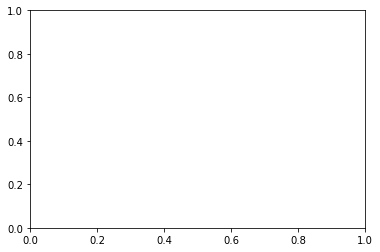

In [34]:
plt.scatter(x,
            y,
            color=[ourcolors[i] for i in kmeans.labels_])